# Problem Statement

### Business Problem Overview

To expand business on the basis of revenue-generating clients, telco businesses must both draw in new ones and prevent contract terminations (=churn). When it comes to contract termination, clients may do so for a variety of reasons, including better price offers more enticing packages, negative service interactions, or changes in their circumstances.

Customers in the telecom sector have access to a variety of service providers and can actively switch from one operator to another. The telecoms business has an average annual churn rate of 15 to 25 percent in this fiercely competitive market. Customer retention has now surpassed customer acquisition in importance due to the fact that it is 5–10 times more expensive to gain new customers than to keep existing ones.

Churn analytics offers useful tools for estimating client churn and defining its fundamental causes of it. The percentage of consumers that cancel a product or service within a specified time frame is the most common way to display the churn indicator (mostly months).


### Business Objective

In order to minimize the customer churn rate, I will perform exploratory data analysis on customer-level data to identify the key signs of why customers are leaving the business.

## Impot Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
 data = pd.read_csv('Telecom_Churn.csv')

In [3]:
# Viewing data's first 5 row

data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Chicking shape of data

data.shape

(3333, 20)

#### Data has 3333 rows and 20 columns.

In [5]:
# Checking data types

data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

## Ckechking null or missing values

In [6]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### In our data there no null or missing values

## Checking unique values in each feature

In [7]:
data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

## Data Describe

In [8]:
data.describe() 

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Creating copy of the current data and assigning to df
df=data.copy()

In [10]:
# Creating churn dataset
df_churn=df[(df['Churn']==True)]

## Exploring Target Labels - Univariate analysis

In [11]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Churn')

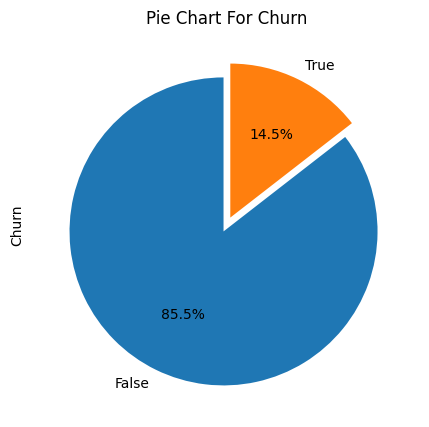

In [12]:
df['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Churn')

#### Our data is imblance

#### Any data with unequal class distribution is technically imblance.

#### In our data 85.5% data not getting churn and remaining 14.5% churn. 

## Exploring State feature - Bivariate analysis

In [13]:
# Unique states

df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [14]:
# Number of Unique states

df['State'].nunique()

51

In [15]:
# Creating df_statewise_churn_count% foe analysis

states_name=df['State'].unique()
churn_true=[df[(df['State']==state)]['Churn'].value_counts()[1] for state in states_name]
chrun_false=[df[(df['State']==state)]['Churn'].value_counts()[0] for state in states_name]

df_statewise_churn_count=pd.DataFrame({'states_name' : states_name,
                                       'churn_true'  : churn_true,
                                       'chrun_false' : chrun_false})

df_statewise_churn_count['churn_true %']= round(((df_statewise_churn_count['churn_true'])/
                                                 ((df_statewise_churn_count['churn_true'])+ (df_statewise_churn_count['chrun_false'])))*100,2)
df_statewise_churn_count['churn_false %']= round(((df_statewise_churn_count['chrun_false'])/
                                                  ((df_statewise_churn_count['churn_true'])+ (df_statewise_churn_count['chrun_false'])))*100,2)
df_statewise_churn_count

,states_name,churn_true,chrun_false,churn_true %,churn_false %
0,KS,13,57,18.57,81.43
1,OH,10,68,12.82,87.18
2,NJ,18,50,26.47,73.53
3,OK,9,52,14.75,85.25
4,AL,8,72,10.00,90.00
5,MA,11,54,16.92,83.08
6,MO,7,56,11.11,88.89
7,LA,4,47,7.84,92.16
8,WV,10,96,9.43,90.57
9,IN,9,62,12.68,87.32


In [16]:
#Filtering states which have rate more than 20% 

df_statewise_churn_more_20=df_statewise_churn_count.sort_values(by=['churn_true %'],ascending=False)[(df_statewise_churn_count['churn_true %']>=20)]
df_statewise_churn_more_20

,states_name,churn_true,chrun_false,churn_true %,churn_false %
36,CA,9,25,26.47,73.53
2,NJ,18,50,26.47,73.53
17,TX,18,54,25.00,75.00
29,MD,17,53,24.29,75.71
21,SC,14,46,23.33,76.67
33,MI,16,57,21.92,78.08
46,MS,14,51,21.54,78.46
40,WA,14,52,21.21,78.79
42,NV,14,52,21.21,78.79
45,ME,13,49,20.97,79.03


Text(0, 0.5, '% Churn Rate')

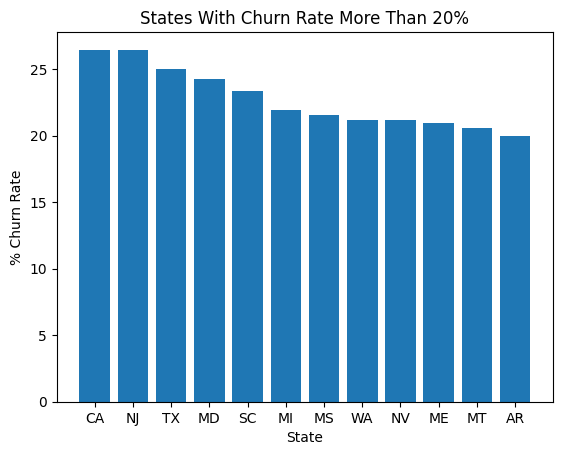

In [17]:
# bar plot of states which have rate more than 20% 

plt.bar(df_statewise_churn_more_20['states_name'],df_statewise_churn_more_20['churn_true %'])
plt.title('States With Churn Rate More Than 20%')
plt.xlabel('State')
plt.ylabel('% Churn Rate')

In [18]:
# Bottom 10 States which have less churn rate

df_statewise_churn_count.sort_values(by=['churn_true %']).head(10)

,states_name,churn_true,chrun_false,churn_true %,churn_false %
24,HI,3,50,5.66,94.34
28,AK,3,49,5.77,94.23
20,AZ,4,60,6.25,93.75
16,VA,5,72,6.49,93.51
11,IA,3,41,6.82,93.18
7,LA,4,47,7.84,92.16
22,NE,5,56,8.20,91.80
25,IL,5,53,8.62,91.38
31,WI,7,71,8.97,91.03
10,RI,6,59,9.23,90.77


Text(0, 0.5, '% Churn Rate')

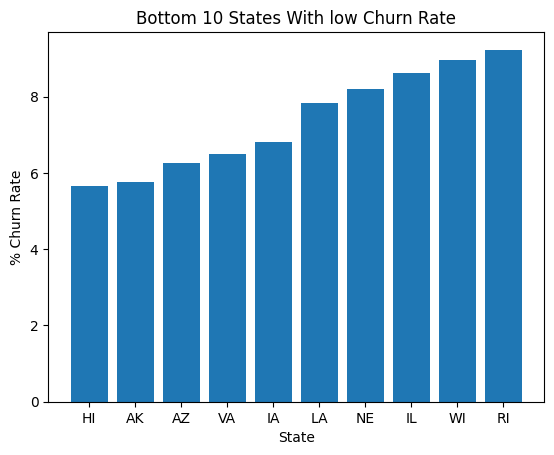

In [19]:
# Bar plot of Bottom 10 States which have less churn rate

plt.bar((df_statewise_churn_count.sort_values(by=['churn_true %']).head(10))['states_name'],(df_statewise_churn_count.sort_values(by=['churn_true %']).head(10))['churn_true %'])
plt.title('Bottom 10 States With low Churn Rate')
plt.xlabel('State')
plt.ylabel('% Churn Rate')

#### State 'CA' , 'NJ' have high churn rate of 26.47%.

#### 'CA', 'NJ', 'TX', 'MD', 'SC', 'MI', 'MS', 'WA', 'NV', 'ME', 'MT' and 'AR' have churn rate more than 20%.

#### State 'HI' have minimum churn rate of 5.66%.

## Exploring Area code feature - Bivariate analysis

In [20]:
# Unique area code

df['Area code'].nunique()

3

In [21]:
# Value count of each area code

df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

Text(0.5, 1.0, ' Churn count area code wise')

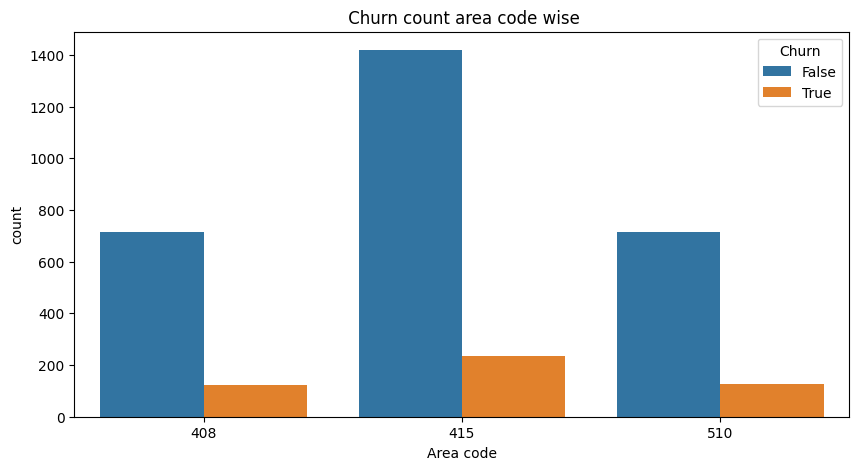

In [22]:
# Ploting churn count area code wise

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df['Area code'],hue='Churn',data=df)
plt.title(' Churn count area code wise')

In [23]:
df_Area_Code_415=df.groupby('Area code').get_group(415)
df_Area_Code_415[df_Area_Code_415['Churn']==True]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
76,DC,82,415,No,No,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,ID,82,415,No,No,0,266.9,83,45.37,229.7,74,19.52,251.7,99,11.33,11.0,6,2.97,3,True
3268,WA,84,415,No,No,0,289.1,100,49.15,233.8,97,19.87,223.5,148,10.06,12.7,2,3.43,2,True
3287,KS,170,415,No,Yes,42,199.5,119,33.92,135.0,90,11.48,184.6,49,8.31,10.9,3,2.94,4,True
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True


In [24]:
# creating df_areawise_churn_count%

area_code=df['Area code'].unique()
churn_true=[df[(df['Area code']==area)]['Churn'].value_counts()[1] for area in area_code]
chrun_false=[df[(df['Area code']==area)]['Churn'].value_counts()[0] for area in area_code]

df_areawise_churn_count=pd.DataFrame({'area_code' : area_code,
                                       'churn_true'  : churn_true,
                                       'chrun_false' : chrun_false})
df_areawise_churn_count
df_areawise_churn_count['churn_true %']= round(((df_areawise_churn_count['churn_true'])/
                                                 ((df_areawise_churn_count['churn_true'])+ (df_areawise_churn_count['chrun_false'])))*100,2)
df_areawise_churn_count['churn_false %']= round(((df_areawise_churn_count['chrun_false'])/
                                                  ((df_areawise_churn_count['churn_true'])+ (df_areawise_churn_count['chrun_false'])))*100,2)
df_areawise_churn_count

,area_code,churn_true,chrun_false,churn_true %,churn_false %
0,415,236,1419,14.26,85.74
1,408,122,716,14.56,85.44
2,510,125,715,14.88,85.12


Text(0.5, 1.0, 'churn rate % of each area')

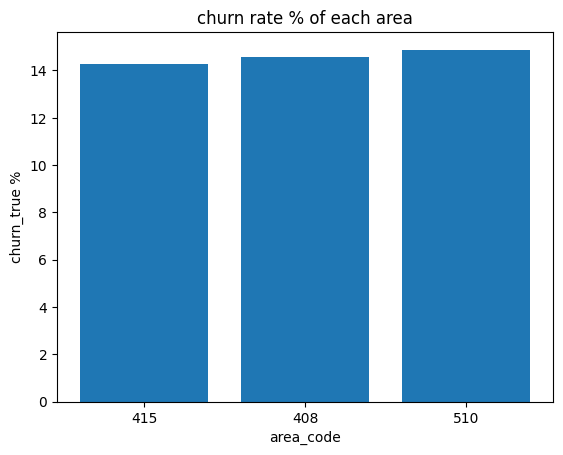

In [25]:
# Ploting churn rate % of each area

plt.bar(df_areawise_churn_count['area_code'].astype('str'),df_areawise_churn_count['churn_true %'])
plt.xlabel("area_code")
plt.ylabel("churn_true %")
plt.title("churn rate % of each area")

#### There is three area code that is 408, 415, 510

#### Churn rate of all 3 area code almost same that is around 14.5%

## Exploring Account length	 feature - Bivariate analysis

In [26]:
# Creating Account lenth churn and not churn df

Account_length_churn=df[(df['Churn']==True)]
Account_length_not_churn=df[(df['Churn']==False)]

In [27]:
# Mean 

print('Mean of Accout length of all data',df['Account length'].mean())
print('Mean of Accout length of Churn',Account_length_churn['Account length'].mean())
print('Mean of Accout length of Not churn',Account_length_not_churn['Account length'].mean())

Mean of Accout length of all data 101.06480648064806
Mean of Accout length of Churn 102.66459627329192
Mean of Accout length of Not churn 100.79368421052632


In [28]:
# Median 

df['Account length'].median()
print('Median of Accout length of all data',df['Account length'].median())
print('Median of Accout length of Churn',Account_length_churn['Account length'].median())
print('Median of Accout length of Not churn',Account_length_not_churn['Account length'].median())

Median of Accout length of all data 101.0
Median of Accout length of Churn 103.0
Median of Accout length of Not churn 100.0


#### Here all Means and Medians of acount length are almost same then we can say account lenth is normally distrubuted .

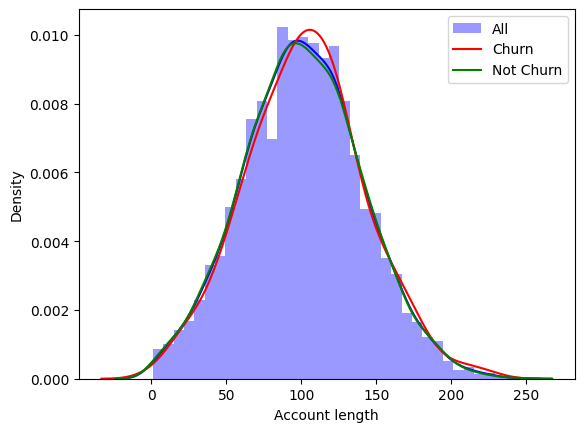

In [29]:
sns.distplot(df['Account length'], color='blue' , label='All') 
sns.distplot(Account_length_churn['Account length'],color='red' , label='Churn',hist=False)
sns.distplot(Account_length_not_churn['Account length'],color='green' , label='Not Churn',hist=False) 
plt.legend()

#### The account length of churn, not churn and for all data is normal distribution

<Figure size 1000x800 with 0 Axes>

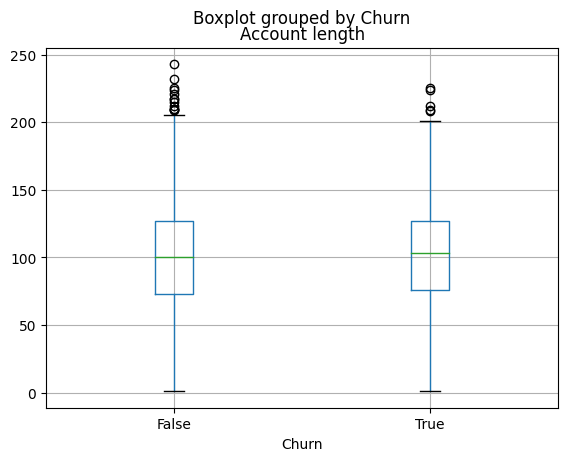

In [62]:
#Analysing by using boxplot diagram between 'Account length' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Account length', by='Churn')
fig.suptitle('Account length', fontsize=14, fontweight='bold')
plt.show()

#### the account length have some outliers

## Exploring International plan	feature - Bivariate analysis

In [31]:
# cheking unique values
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
# checking value count
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

Text(0.5, 1.0, 'Pie Chart For International plan')

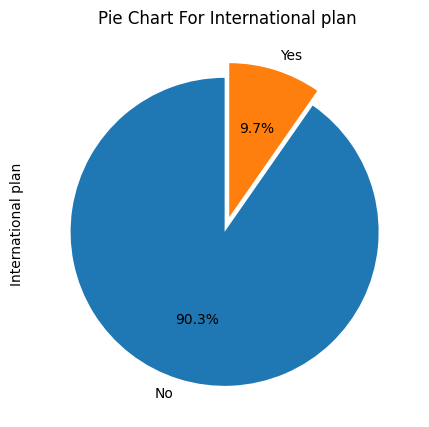

In [33]:
# Ploting value counts

df['International plan'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For International plan')

#### Only 9.7% customer use International plan

In [34]:
# creating df International plan churn count%

Int_plan=df['International plan'].unique()
churn_true=[df[(df['International plan']==plan)]['Churn'].value_counts()[1] for plan in Int_plan]
chrun_false=[df[(df['International plan']==plan)]['Churn'].value_counts()[0] for plan in Int_plan]

df_Int_plan_churn_count=pd.DataFrame({'International plan' : Int_plan,
                                       'churn_true'  : churn_true,
                                       'chrun_false' : chrun_false})

df_Int_plan_churn_count['churn_true %']= round(((df_Int_plan_churn_count['churn_true'])/
                                                 ((df_Int_plan_churn_count['churn_true'])+ (df_Int_plan_churn_count['chrun_false'])))*100,2)
df_Int_plan_churn_count['churn_false %']= round(((df_Int_plan_churn_count['chrun_false'])/
                                                  ((df_Int_plan_churn_count['churn_true'])+ (df_Int_plan_churn_count['chrun_false'])))*100,2)
df_Int_plan_churn_count

,International plan,churn_true,chrun_false,churn_true %,churn_false %
0,No,346,2664,11.50,88.50
1,Yes,137,186,42.41,57.59


Text(0.5, 1.0, 'churn rate % of International plan')

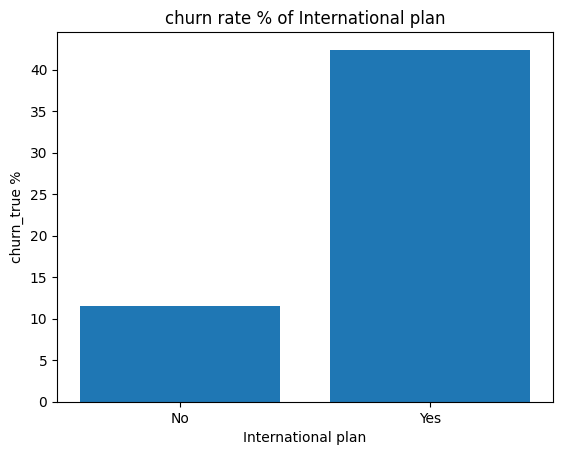

In [35]:
# Ploting churn rate % of International plan

plt.bar(df_Int_plan_churn_count['International plan'].astype('str'),df_Int_plan_churn_count['churn_true %'])
plt.xlabel("International plan")
plt.ylabel("churn_true %")
plt.title("churn rate % of International plan")

#### If International plan is yes then churn rate is high that is 42.41%

#### If International plan is No then churn rate is high that is 11.5%

## Exploring Voice mail plan	feature - Bivariate analysis

In [36]:
# checking value count of Voice mail plan

df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Voice mail plan')

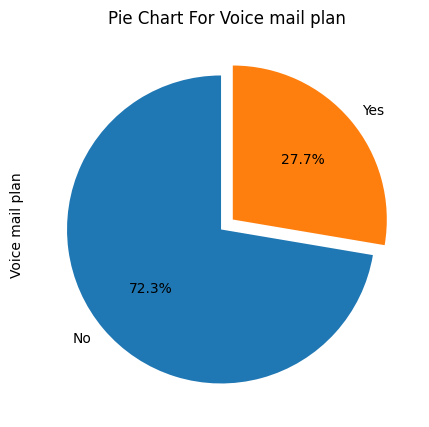

In [37]:
# Ploting value counts

df['Voice mail plan'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Voice mail plan')

#### Only 27.7% customer use Voice mail plan

In [38]:
# creating df Voice mail plan churn count%

voice_plan=df['Voice mail plan'].unique()
churn_true=[df[(df['Voice mail plan']==plan)]['Churn'].value_counts()[1] for plan in voice_plan]
chrun_false=[df[(df['Voice mail plan']==plan)]['Churn'].value_counts()[0] for plan in voice_plan]

df_voice_plan_churn_count=pd.DataFrame({'Voice mail plan' : Int_plan,
                                       'churn_true'  : churn_true,
                                       'chrun_false' : chrun_false})

df_voice_plan_churn_count['churn_true %']= round(((df_voice_plan_churn_count['churn_true'])/
                                                 ((df_voice_plan_churn_count['churn_true'])+ (df_voice_plan_churn_count['chrun_false'])))*100,2)
df_voice_plan_churn_count['churn_false %']= round(((df_voice_plan_churn_count['chrun_false'])/
                                                  ((df_voice_plan_churn_count['churn_true'])+ (df_voice_plan_churn_count['chrun_false'])))*100,2)
df_voice_plan_churn_count

,Voice mail plan,churn_true,chrun_false,churn_true %,churn_false %
0,No,80,842,8.68,91.32
1,Yes,403,2008,16.72,83.28


Text(0.5, 1.0, 'churn rate % of International plan')

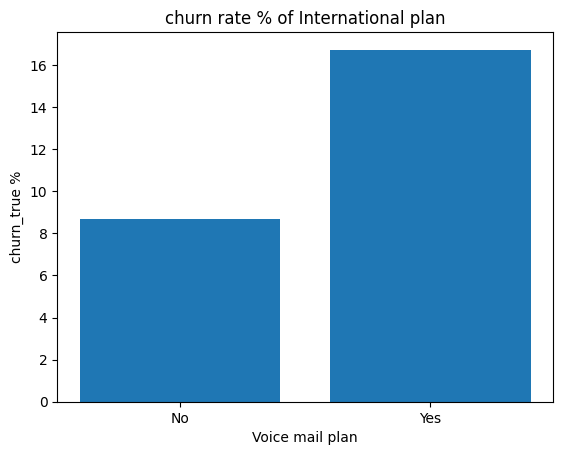

In [39]:
# Ploting churn rate % of Voice mail plan

plt.bar(df_voice_plan_churn_count['Voice mail plan'],df_voice_plan_churn_count['churn_true %'])
plt.xlabel("Voice mail plan")
plt.ylabel("churn_true %")
plt.title("churn rate % of International plan")

#### If voice plan not activate then churn rate is 16.72% 

## Exploring Number vmail messages	feature - Bivariate analysis

In [40]:
#show the data of 'Number vmail messages' 
df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9], dtype=int64)

In [41]:
#details of 'Number vmail messages' data
df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

<AxesSubplot: xlabel='Number vmail messages', ylabel='Density'>

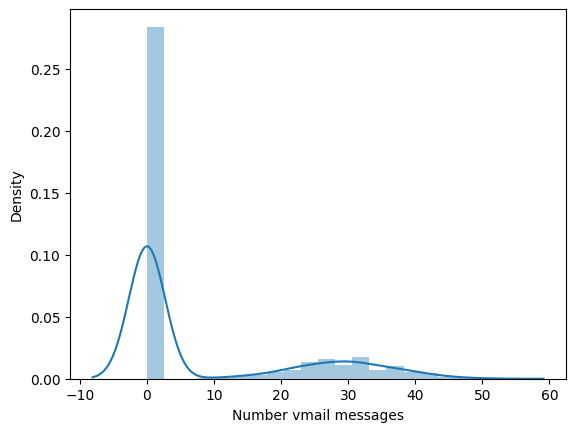

In [42]:
#Analysing by using displot diagram
sns.distplot(df['Number vmail messages'])

<Figure size 1000x800 with 0 Axes>

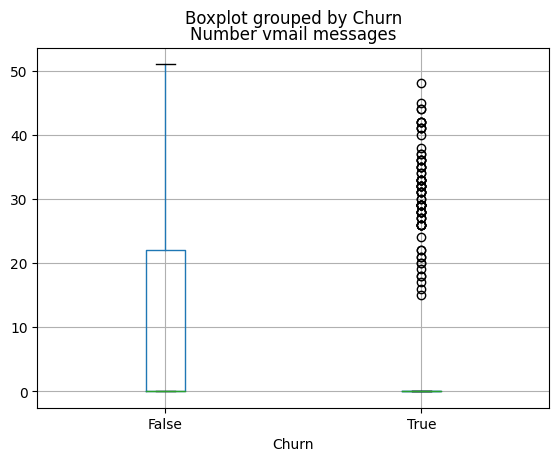

In [43]:
#Analysing by using boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Number vmail messages', by='Churn')
fig.suptitle('Number vmail message', fontsize=14, fontweight='bold')
plt.show()

####  After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then there is a churn

#### For that, we need to improve the voice mail quality.

## Exploring Customer service calls feature - Bivariate analysis

In [44]:
#customer service calls value count
df['Customer service calls']=df['Customer service calls'].astype('str')
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [51]:
#Calculating the Customer service calls vs Churn percentage
Customer_service_calls_data = pd.crosstab(df['Customer service calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


<AxesSubplot: xlabel='Customer service calls', ylabel='count'>

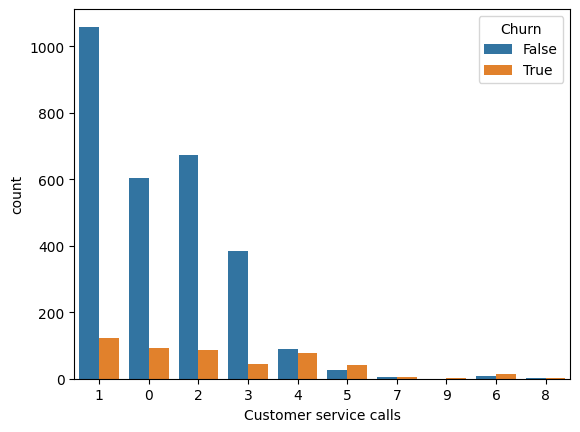

In [53]:
#Analysing using countplot
sns.countplot(x='Customer service calls',hue="Churn",data =df)

#### It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.

#### The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.

#### So operator should work to improve the service call.

## Exploring Total day minutes feature - Bivariate analysis

In [54]:
# Creating Account lenth churn and not churn df

Total_day_minutes_churn=df[(df['Churn']==True)]
Total_day_minutes_not_churn=df[(df['Churn']==False)]

In [60]:
# Mean 

print('Mean of Total day minutes of all data',df['Total day minutes'].mean())
print('Mean of Total day minutes of Churn',Account_length_churn['Total day minutes'].mean())
print('Mean of Total day minutes of Not churn',Account_length_not_churn['Total day minutes'].mean())
print()

# Median 

df['Total day minutes'].median()
print('Median of Total day minutes of all data',df['Total day minutes'].median())
print('Median of Total day minutes of Churn',Account_length_churn['Total day minutes'].median())
print('Median of Total day minutes of Not churn',Account_length_not_churn['Total day minutes'].median())

Mean of Total day minutes of all data 179.77509750975094
Mean of Total day minutes of Churn 206.91407867494823
Mean of Total day minutes of Not churn 175.1757543859649

Median of Total day minutes of all data 179.4
Median of Total day minutes of Churn 217.6
Median of Total day minutes of Not churn 177.2


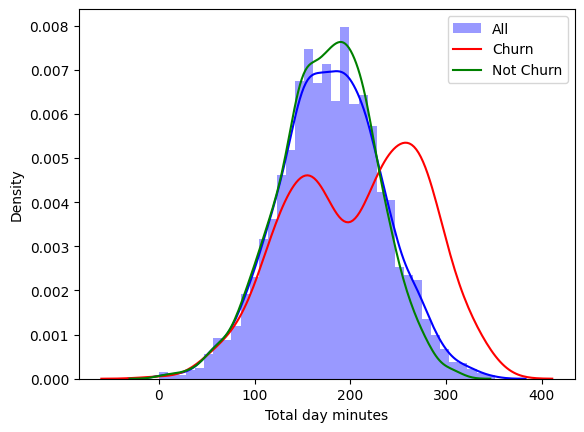

In [61]:
sns.distplot(df['Total day minutes'], color='blue' , label='All') 
sns.distplot(Total_day_minutes_churn['Total day minutes'],color='red' , label='Churn',hist=False)
sns.distplot(Total_day_minutes_not_churn['Total day minutes'],color='green' , label='Not Churn',hist=False) 
plt.legend()

<Figure size 1000x800 with 0 Axes>

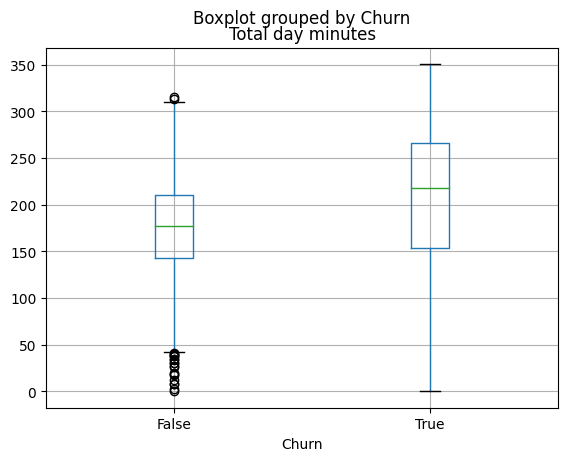

In [63]:
#Analysing by using boxplot diagram between 'Account length' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Total day minutes', by='Churn')
fig.suptitle('Total day minutes"', fontsize=14, fontweight='bold')
plt.show()